##**Higgs Boson Particle Discovery**






#### **Problem Statement**
- The task is to **classify** whether **signal or background**

#### **Dataset Information:**

- **Number of Rows :** 250000

- **Number of Columns :** 8

|Variable          |Description         |
|------------------|--------------------|
|EventId           |An unique integer identifier of the event|
|DER_mass_MMC      |The estimated mass mH of the Higgs boson candidate, obtained through a probabilistic phase space integration.|
|DER_mass_transverse_met_lep |The transverse mass between the missing transverse energy and the lepton|
|DER_mass_vis      |The invariant mass of the hadronic tau and the lepton.|
|DER_pt_h          |The modulus of the vector sum of the transverse momentum of the hadronic tau, the lepton and the missing transverse energy vector.|
|DER_deltaeta_jet_jet|The absolute value of the pseudorapidity separation between the two jets (undefined if PRI_jet_num ≤ 1).|
|DER_mass_jet_jet |The invariant mass of the two jets (undefined if PRI_jet_num ≤ 1).|
|DER_prodeta_jet_jet	|The product of the pseudorapidities of the two jets (undefined if PRI_jet_num ≤ 1).|
|Weight	|The event weight wi|
|Label	|The event label (string) yi ∈ {s,b} (**s** for **signal**, **b** for **background**).

- The data consists of simulated signal and background events in a **8 dimensional features**
space.

- **Each event** data point is assigned an **ID and a weight** as explained before. The 8
features consisted of real values and included different kinematic properties of that event
and the particles involved including estimated particle **mass, invariant mass of hadronic
tau and lepton, vector sum of the transverse momentum of hadronic tau, centrality of
azimuthal angle, pseudo-rapidity of the leptons, the number of jets** and their properties,
etc.

- The **training** data consisted of **250,000** eventsEach event of training data was
marked by one of **two labels; 's' for signal and 'b' for background.** The task was to submit
a file consisting of 's' and 'b' predictions for each point in the test set.

- **Values** of **some feature** were **invalid** for some of the events; those features or properties
were **missing** in those events. Such values were **marked -999.0** which was quite out of
the range of other normal feature values.

- Because of different behaviors of the four physical processes, **some features do
not exist**, this leads to some **missing values** indicated by **-999** in the data.

- As mentioned earlier, some of the feature values were **invalid** for some
events and were hence **marked -999.0.** It was observed that the there were a **total of 6
different possible combinations** of events that had one or more of the features marked
invalid. The **invalid features could altogether be eliminated** when the events with the
same configuration of invalid features were considered as independent training sets. This
gave rise to 6 mini-training sets which could be trained independently. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
from collections import Counter
import warnings
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,normalize,MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
#Importing Libraries
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,normalize,MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve
import seaborn as sns


import tensorflow as tf

##**Loading Data**

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Mobile invoice/Dataset.csv', delimiter=',')

In [4]:
data.shape


(250000, 33)

In [5]:
data_new=data.drop(["Weight"], axis=1)
data_new.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,b


In [6]:
data_new= data_new[['DER_mass_MMC','DER_mass_transverse_met_lep','DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet','Label']]

In [7]:
data_new


,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,Label
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,s
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,b
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,b
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,b
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,b
...,...,...,...,...,...,...,...,...
249995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,b
249996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,b
249997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,s
249998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,b


##**EDA (Exploratory Data Analysis)**

In [8]:
data_new.describe()


,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603
std,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877
min,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000
25%,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000
50%,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000
75%,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000
max,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000


In [9]:
data_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DER_mass_MMC                 250000 non-null  float64
 1   DER_mass_transverse_met_lep  250000 non-null  float64
 2   DER_mass_vis                 250000 non-null  float64
 3   DER_pt_h                     250000 non-null  float64
 4   DER_deltaeta_jet_jet         250000 non-null  float64
 5   DER_mass_jet_jet             250000 non-null  float64
 6   DER_prodeta_jet_jet          250000 non-null  float64
 7   Label                        250000 non-null  object 
dtypes: float64(7), object(1)
memory usage: 15.3+ MB


b    164333
s     85667
Name: Label, dtype: int64


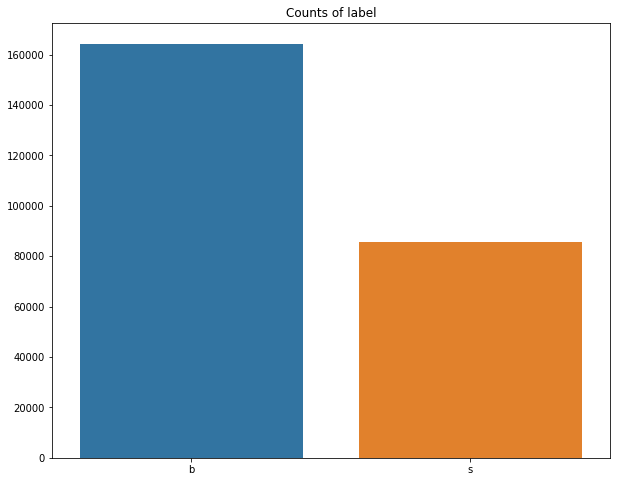

In [10]:
fig,axes=plt.subplots(figsize=(10,8))
print(data_new['Label'].value_counts())
sns.barplot(x = data_new['Label'].value_counts().index, y = data_new['Label'].value_counts().values)
plt.title('Counts of label')
plt.show()


In [11]:
# Encoding the labels
label_data = preprocessing.LabelEncoder()
data_new['Label'] = label_data.fit_transform(data_new['Label'])
data_new.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,Label
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,1
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,0
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,0
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,0
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,0


##**Data visualization**

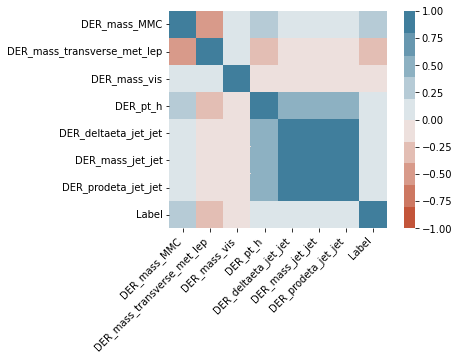

In [12]:
corr = data_new.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 230, n=10),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [13]:
#IQR Value of Each Column
Q1 = data_new.quantile(0.25)
Q3 =  data_new.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

DER_mass_MMC                     52.50550
DER_mass_transverse_met_lep      54.35700
DER_mass_vis                     32.87025
DER_pt_h                         65.10025
DER_deltaeta_jet_jet            999.49000
DER_mass_jet_jet               1082.44600
DER_prodeta_jet_jet             994.40700
Label                             1.00000
dtype: float64


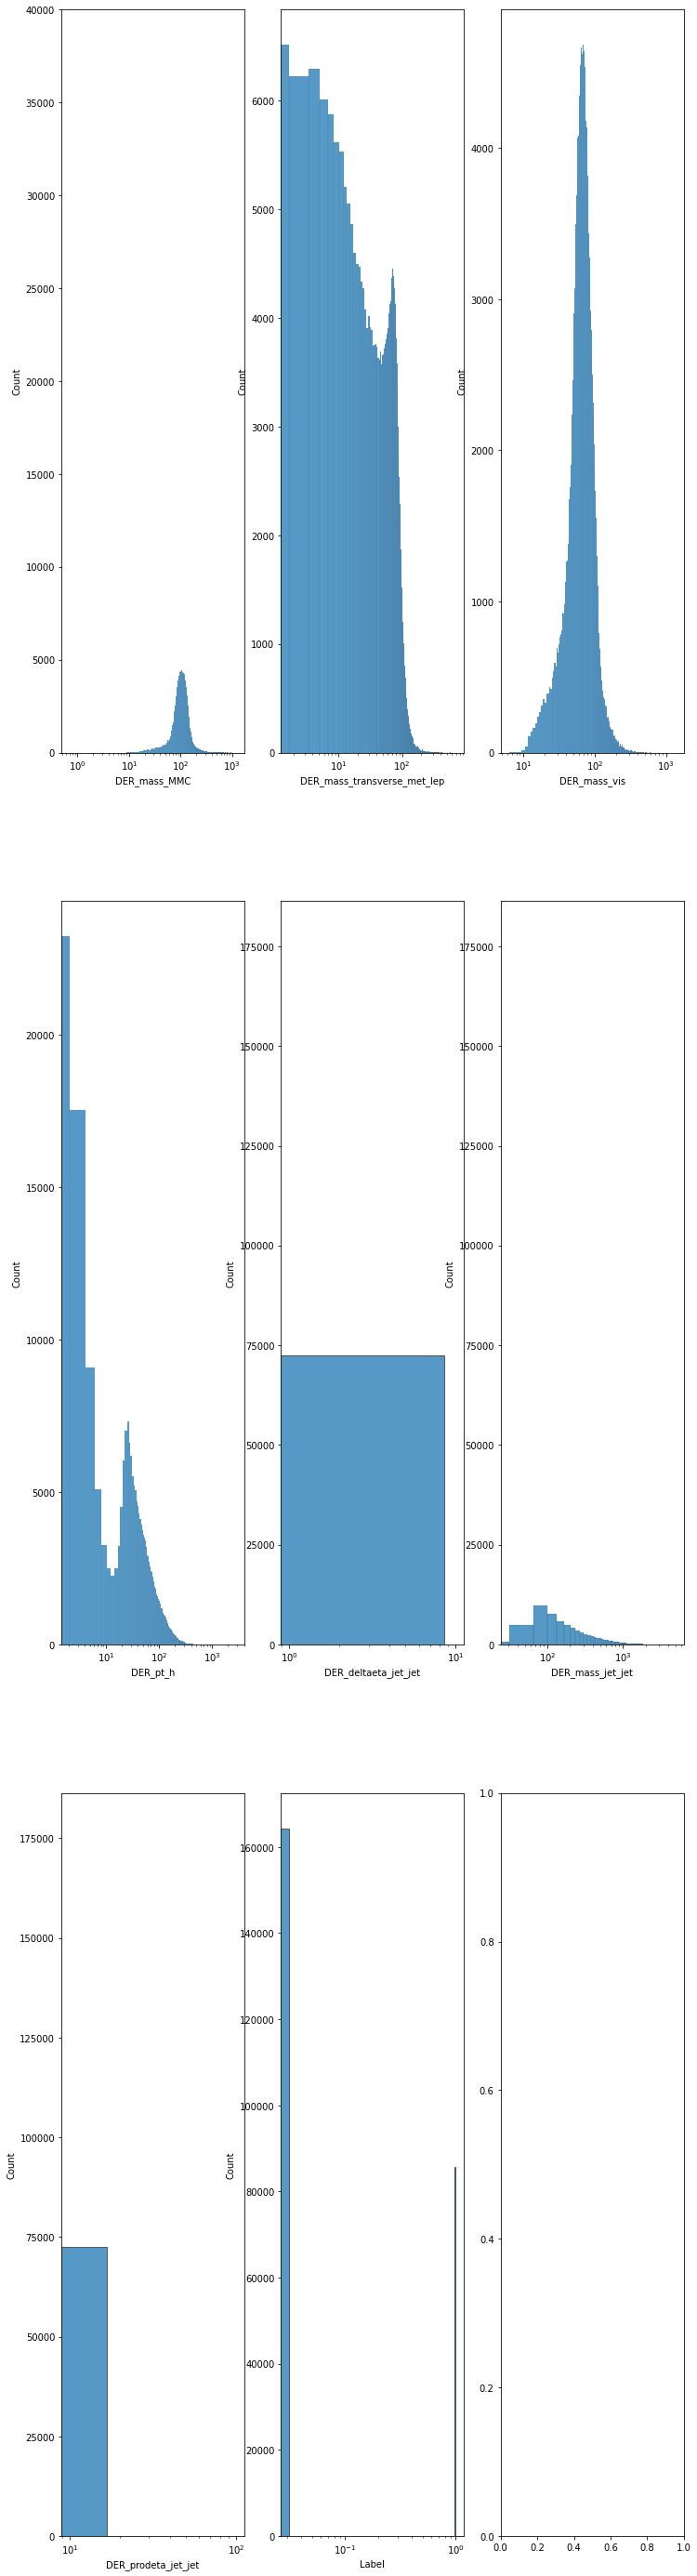

In [15]:
import math
cols = 3
rows = math.ceil(len(data_new.columns)/cols)


fig, axen = plt.subplots(rows, cols, figsize = (12, 50))
for v, ax in zip(data_new.columns, axen.ravel()):
    sns.histplot(data_new[v], ax=ax)
    ax.set_xscale('log')

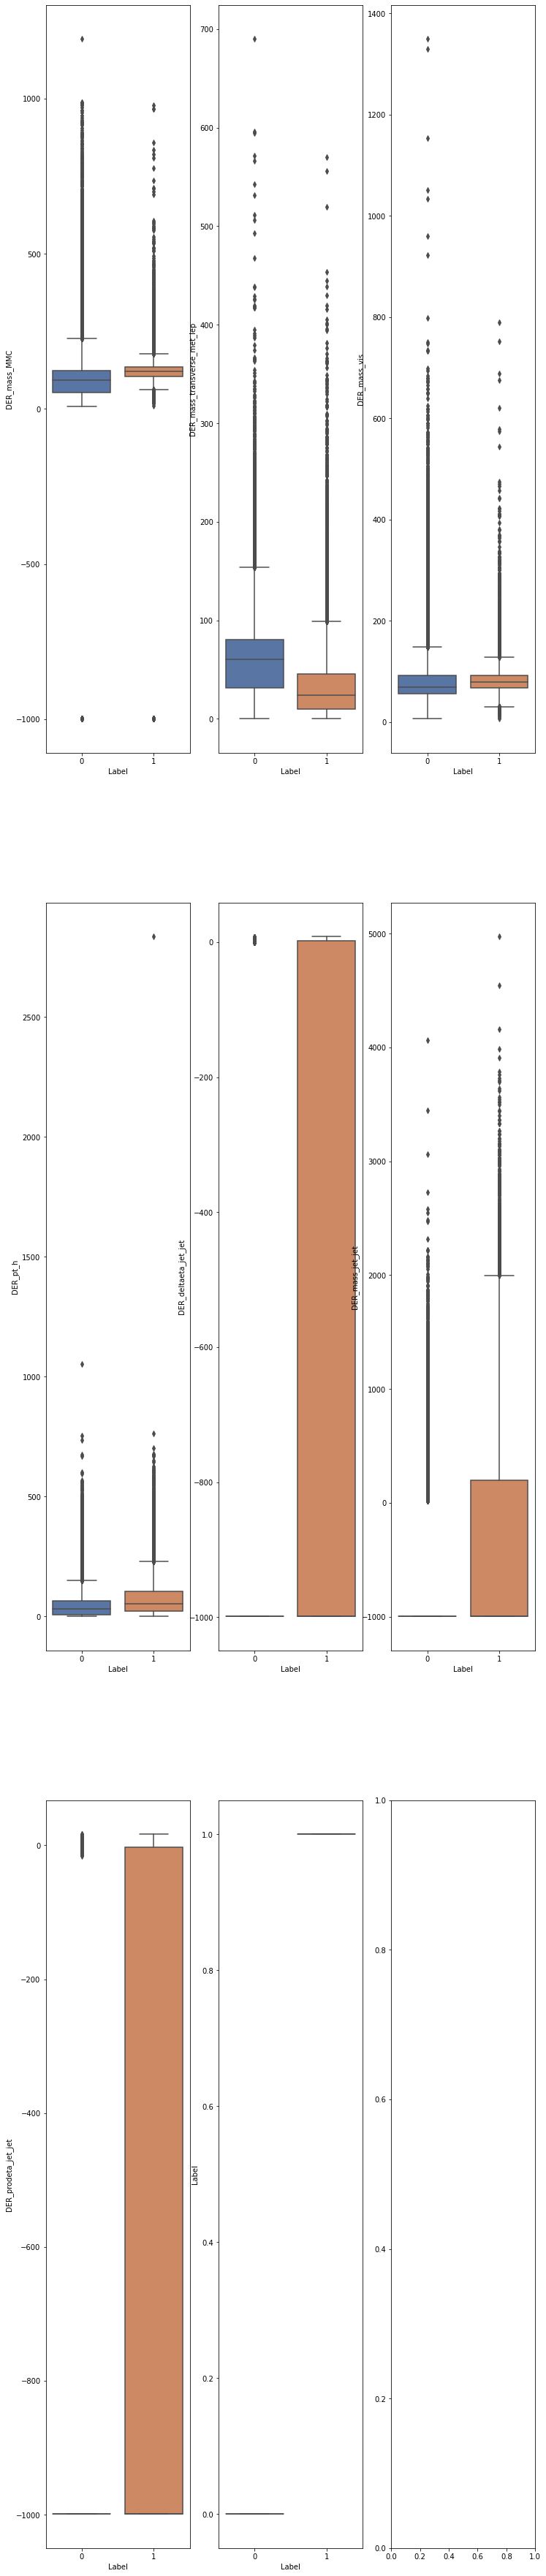

In [16]:
fig, axen = plt.subplots(rows, cols, figsize = (12, 64))
for v, ax in zip(data_new.columns, axen.ravel()):
    sns.set(style='whitegrid')
    sns.boxplot(x="Label",
                y=data_new[v],
                data=data_new,ax=ax)

In [17]:
def remove_outlier(df):
    QI = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR =    Q3-Q1 
    fence_low  = Q1-1.5*IQR
    fence_high = Q3+1.5*IQR
    df_new= df[~((df > fence_low) & (df< fence_high))]
    return df_new

In [18]:
dr = remove_outlier(data_new)

In [19]:
dr.tail()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,Label
249995,-999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249996,-999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249999,-999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##**Data Preprocessing**

In [22]:
data_new.isnull().sum()


DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
Label                          0
dtype: int64

In [24]:
label_data = preprocessing.LabelEncoder()
data_new['Label'] = label_data.fit_transform(data_new['Label'])
data_new.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,Label
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,1
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,0
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,0
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,0
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,0


In [26]:
data_new[data_new==-999.000] = np.NaN


In [27]:
data_new.fillna(data_new.mean(), inplace = True)

In [28]:
data_new

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,Label
0,138.470000,51.655,97.827,27.980,0.910000,124.71100,2.666000,1
1,160.937000,68.768,103.235,48.146,2.403735,371.78336,-0.821688,0
2,121.858528,162.172,125.953,35.635,2.403735,371.78336,-0.821688,0
3,143.905000,81.417,80.943,0.414,2.403735,371.78336,-0.821688,0
4,175.864000,16.915,134.805,16.405,2.403735,371.78336,-0.821688,0
...,...,...,...,...,...,...,...,...
249995,121.858528,71.989,36.548,5.042,2.403735,371.78336,-0.821688,0
249996,121.858528,58.179,68.083,22.439,2.403735,371.78336,-0.821688,0
249997,105.457000,60.526,75.839,39.757,2.403735,371.78336,-0.821688,1
249998,94.951000,19.362,68.812,13.504,2.403735,371.78336,-0.821688,0


##**Training Model**

In [30]:
y_train = data_new['Label'].values
x_train = data_new.drop(['Label'], axis=1)

In [31]:
x_train.astype

<bound method NDFrame.astype of         DER_mass_MMC  ...  DER_prodeta_jet_jet
0         138.470000  ...             2.666000
1         160.937000  ...            -0.821688
2         121.858528  ...            -0.821688
3         143.905000  ...            -0.821688
4         175.864000  ...            -0.821688
...              ...  ...                  ...
249995    121.858528  ...            -0.821688
249996    121.858528  ...            -0.821688
249997    105.457000  ...            -0.821688
249998     94.951000  ...            -0.821688
249999    121.858528  ...            -0.821688

[250000 rows x 7 columns]>

In [32]:
data_new.astype

<bound method NDFrame.astype of         DER_mass_MMC  DER_mass_transverse_met_lep  ...  DER_prodeta_jet_jet  Label
0         138.470000                       51.655  ...             2.666000      1
1         160.937000                       68.768  ...            -0.821688      0
2         121.858528                      162.172  ...            -0.821688      0
3         143.905000                       81.417  ...            -0.821688      0
4         175.864000                       16.915  ...            -0.821688      0
...              ...                          ...  ...                  ...    ...
249995    121.858528                       71.989  ...            -0.821688      0
249996    121.858528                       58.179  ...            -0.821688      0
249997    105.457000                       60.526  ...            -0.821688      1
249998     94.951000                       19.362  ...            -0.821688      0
249999    121.858528                       72.756  ... 

In [33]:
from sklearn.model_selection import train_test_split
X_train_SS, X_test_SS, y_train_SS, y_test_SS = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

In [34]:
import numpy
X_train_SS= X_train_SS.to_numpy()
X_test_SS=X_test_SS.to_numpy()

In [36]:
import numpy
print(numpy.__version__)

1.19.5


In [38]:
X_train_SS.shape


(167500, 7)

In [39]:
# reshape for rnn

X_train_SS = X_train_SS.reshape(X_train_SS.shape[0],X_train_SS.shape[1],1)
X_test_SS =X_test_SS.reshape(X_test_SS.shape[0],X_test_SS.shape[1],1)

In [40]:
columns_ = x_train.iloc[:].columns
columns_.shape

(7,)

In [41]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
df_scaled = pd.DataFrame(scalar.fit_transform(x_train), columns = columns_)
df = pd.DataFrame(df_scaled)

In [42]:
df

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet
0,3.149107e-01,0.068332,0.407680,-0.469966,-1.591638e+00,-1.153306e+00,1.806346e+00
1,7.408270e-01,0.552505,0.540136,-0.153167,8.517525e-15,-4.776096e-15,-1.207516e-15
2,-2.963413e-14,3.195156,1.096560,-0.349710,8.517525e-15,-4.776096e-15,-1.207516e-15
3,4.179442e-01,0.910379,-0.005853,-0.903016,8.517525e-15,-4.776096e-15,-1.207516e-15
4,1.023804e+00,-0.914556,1.313369,-0.651804,8.517525e-15,-4.776096e-15,-1.207516e-15
...,...,...,...,...,...,...,...
249995,-2.963413e-14,0.643636,-1.093204,-0.830312,8.517525e-15,-4.776096e-15,-1.207516e-15
249996,-2.963413e-14,0.252913,-0.320829,-0.557013,8.517525e-15,-4.776096e-15,-1.207516e-15
249997,-3.109307e-01,0.319316,-0.130864,-0.284955,8.517525e-15,-4.776096e-15,-1.207516e-15
249998,-5.100973e-01,-0.845324,-0.302973,-0.697378,8.517525e-15,-4.776096e-15,-1.207516e-15


In [43]:
from sklearn.decomposition import PCA
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df))
df_pca

,0,1,2,3,4,5,6
0,-2.681879,0.232380,-0.025619,-0.345093,0.500794,0.010832,0.009519
1,-0.142412,1.030859,-0.179472,0.180757,0.002148,-0.146402,0.004611
2,-0.409862,1.703162,-1.936360,2.021318,-0.050000,0.787459,-0.084861
3,-0.164672,0.634235,-1.115658,0.098398,0.070793,-0.355565,0.061264
4,-0.094121,1.361646,0.476124,-1.379051,0.133613,0.140507,0.073241
...,...,...,...,...,...,...,...
249995,-0.036599,-0.457129,-1.174442,0.146257,0.050238,-0.824082,0.078314
249996,-0.034779,-0.082414,-0.619433,-0.102458,0.050597,-0.264951,0.046940
249997,-0.020948,-0.170877,-0.492744,0.109066,0.023439,0.109531,0.009454
249998,0.093987,-0.714406,-0.206516,-0.982650,0.115667,0.081718,0.073371


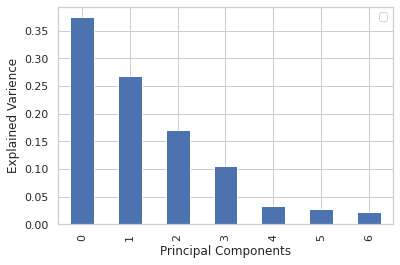

In [44]:
import matplotlib.pyplot as plt
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience');

In [45]:
pca_15 = PCA(n_components=4, random_state = 2020)
principalComponents_15 = pca_15.fit_transform(df)
print('Explained variation by 4 principal components: {}'.format(sum(pca_15.explained_variance_ratio_)*100))

Explained variation by 4 principal components: 91.73045935736866


In [46]:
principal_cols = ['Principal component '+str(i) for i in range(principalComponents_15.shape[1])]
pca_df = pd.DataFrame(data = principalComponents_15,columns=principal_cols)
pca_df.head()

,Principal component 0,Principal component 1,Principal component 2,Principal component 3
0,-2.681879,0.232380,-0.025619,-0.345093
1,-0.142412,1.030859,-0.179472,0.180757
2,-0.409862,1.703162,-1.936360,2.021318
3,-0.164672,0.634235,-1.115658,0.098398
4,-0.094121,1.361646,0.476124,-1.379051


##**LSTM MODEL**

In [47]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate,GRU,Dropout,LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.io import FixedLenFeature
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, normalize
from keras.models import Sequential
from keras.layers import Bidirectional

In [48]:
def build_Lstm_model(train_x,train_y,test_x,test_y):
    inp = Input(shape=(train_x.shape[1],train_x.shape[2]))
    rnn_1st_model = LSTM(units=60, return_sequences=True,recurrent_dropout=0.1)(inp)
    rnn_2nd_model = LSTM(units=60,recurrent_dropout=0.1)(rnn_1st_model)
    dense_layer = Dense(128)(rnn_2nd_model)
    drop_out = Dropout(0.2)(dense_layer)
    output = Dense(1, activation= "sigmoid")(drop_out)
    model = Model(inp, output)
    callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=4, verbose=1, factor=0.6),
                 EarlyStopping(monitor='val_loss', patience=20),
                 ModelCheckpoint(filepath='best_model_LSTM.h5', monitor='val_loss', save_best_only=True)]
    model.summary()
    model.compile(loss="binary_crossentropy", optimizer="adam")
    history = model.fit(train_x, train_y, 
          epochs = 10, 
          batch_size = 128, 
          validation_data=(test_x,  test_y), 
          callbacks=callbacks)
    return history,model

In [49]:
def plot_Loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss over epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()

In [50]:
history_LSTM,Lstm_model = build_Lstm_model(X_train_SS,y_train_SS,X_test_SS,y_test_SS)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 7, 60)             14880     
                                                                 
 lstm_1 (LSTM)               (None, 60)                29040     
                                                                 
 dense (Dense)               (None, 128)               7808      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 51,857
Trainable params: 51,857
Non-trainable p

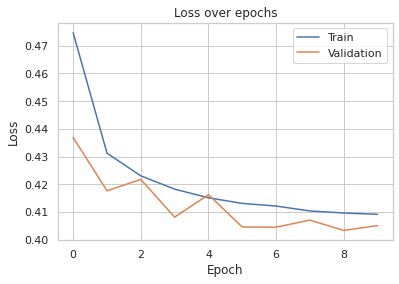

In [51]:
plot_Loss(history_LSTM)

##**Saving model**

In [52]:
Lstm_model.save("LSTM_Higgs_model.h5")

In [54]:
x_predict=[105.457000,	60.526,	75.839,	39.757,	2.403735,	371.78336,	-0.821688]

In [55]:
x_predict=np.array(x_predict)

In [56]:
df = pd.DataFrame(x_predict)

In [57]:
df = df.to_numpy()

In [58]:
df1=df.reshape(1,df.shape[0],df.shape[1])

In [59]:
df1.shape

(1, 7, 1)

In [60]:
Lstm_model.predict(df1)

array([[0.24709365]], dtype=float32)

In [61]:
def prediction(model,input):
    input= np.array(input)
    prediction = model.predict(input)
    return 'b' if prediction[0][0] >= 0.5 else 's'

In [63]:
prediction (,x_predict) 

ValueError: ignored